## Low-rank plus sparse trajectory decomposition for direct exoplanet imaging

Simple example of direct exoplanet imaging.


In [1]:
import sys
sys.path.append("pynopt/")

import vip_hci as vip
from hciplot import plot_frames
from exoplanet_lrpt import exoplanet_lrpt_annular

### Prepare data

The variable ``dataset`` contains a Betapic of size (612, 100, 100)  where the first dimension is time and the other two are the spatial dimensions.

We subsample the cube to include only every third frame. 

You can find sample datasets from VIP_extras https://github.com/vortex-exoplanet/VIP_extras/tree/master/datasets

In [2]:
adi_cube = '../../datasets/bpic_naco'
adi_pa = '../../datasets/bpic_naco'
adi_psf = '../../datasets/naco_psf'

dataset = vip.hci_dataset.Dataset(
    cube=vip.fits.open_fits(adi_cube, verbose=False),
    angles=vip.fits.open_fits(adi_pa, n=1, verbose=False),
    psf=vip.fits.open_fits(adi_psf,verbose=False)
)

dataset.crop_frames(100)
dataset.cube = dataset.cube[0:612:3]
dataset.angles = dataset.angles[0:612:3]

dataset.normalize_psf(verbose=False, size=9)

Cube array shape: (612, 300, 300)
Angles array shape: (612,)
PSF array shape: (39, 39)
New shape: (612, 100, 100)
Normalized PSF array shape: (9, 9)
The attribute `psfn` contains the normalized PSF
`fwhm` attribute set to
4.603


### Apply the algorithm

We test the algorithm using ``rank``=25 and ``sparsity``=10

In [3]:
frame_planet, cube_background, opt_log = exoplanet_lrpt_annular(dataset.cube, dataset.angles, dataset.fwhm, inner_rad=0, outer_rad=50, asize=10, r=25, s=10, MAX_ITER=100, psfn = dataset.psfn, normalize = True, lsqr_init=False, verbosity=1)

Terminated - min relative decrease reached after 16 iterations, 50.56 seconds.

Terminated - min relative decrease reached after 16 iterations, 40.46 seconds.

Terminated - min relative decrease reached after 16 iterations, 42.03 seconds.

Terminated - min relative decrease reached after 16 iterations, 41.76 seconds.

Terminated - min relative decrease reached after 16 iterations, 41.38 seconds.



Because the planet on beta-pictoris data set is known, we know that it is on (62,62). 

Our algorithm can detect the planet.

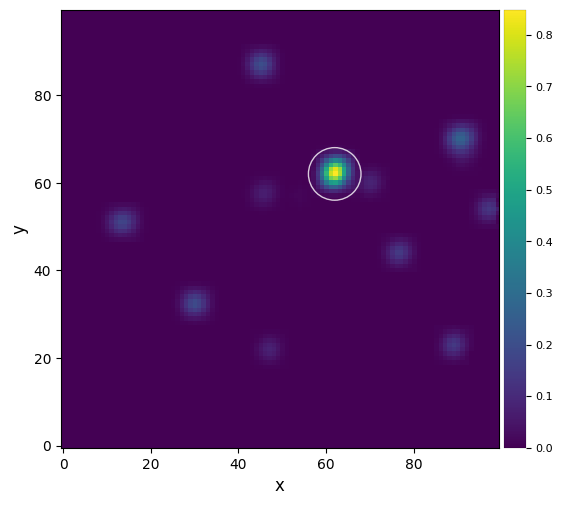

In [5]:
plot_frames(frame_planet, circle=(62,62))